In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders = pd.read_csv('data/orders.csv' )
order_products_train = pd.read_csv('data/order_products__train.csv')
order_products_prior = pd.read_csv('data/order_products__prior.csv')
products = pd.read_csv('data/products.csv')
aisles = pd.read_csv('data/aisles.csv')
departments = pd.read_csv('data/departments.csv')

In [3]:
print(orders.shape)
orders.head(5)

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:

print(order_products_prior.shape)
order_products_prior.head(10)

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [5]:
print(order_products_train.shape)
order_products_train.head(10)

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [6]:
print(products.shape)
products.head(5)

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
print(aisles.shape)
aisles.head(5)

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [8]:
print(departments.shape)
departments.head(5)

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


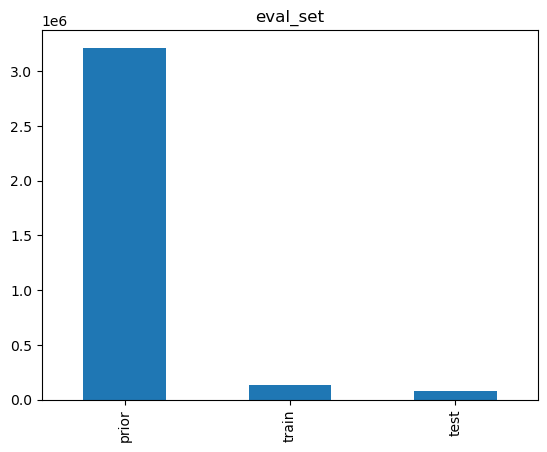

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64


In [9]:
orders_eval = orders['eval_set'].value_counts()
orders_eval.plot(kind='bar', title='eval_set')
plt.show()
print(orders_eval)

In [10]:
orders = orders.loc[orders.eval_set=='prior'] #prior data만 사용

In [11]:
tmp_df = pd.merge(order_products_prior, products, on="product_id", how="left")
tmp_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [12]:
tmp_df = pd.merge(tmp_df, aisles, on="aisle_id", how="left")
tmp_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients


In [14]:
tmp_df = pd.merge(tmp_df, departments, on="department_id", how="left")
tmp_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [15]:
tmp = orders.groupby('user_id').count()

<AxesSubplot: xlabel='count', ylabel='aisle'>

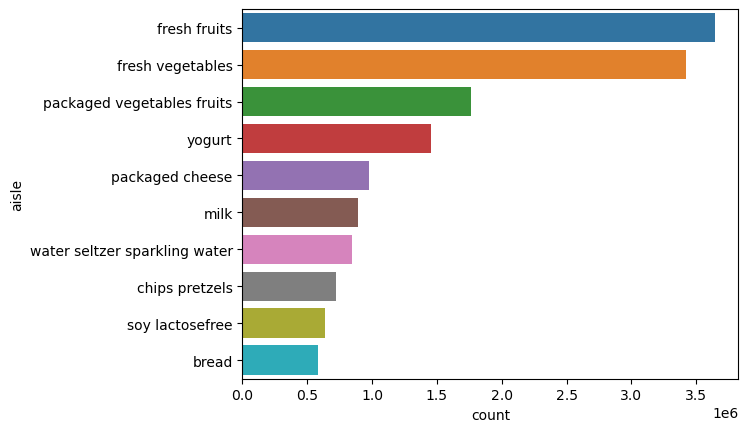

In [16]:
#어느 진열대에서 많이 팔렸는가?
sns.countplot(y="aisle", data=tmp_df, order = tmp_df.aisle.value_counts().iloc[:10].index) # 상위 10개

<AxesSubplot: xlabel='count', ylabel='product_name'>

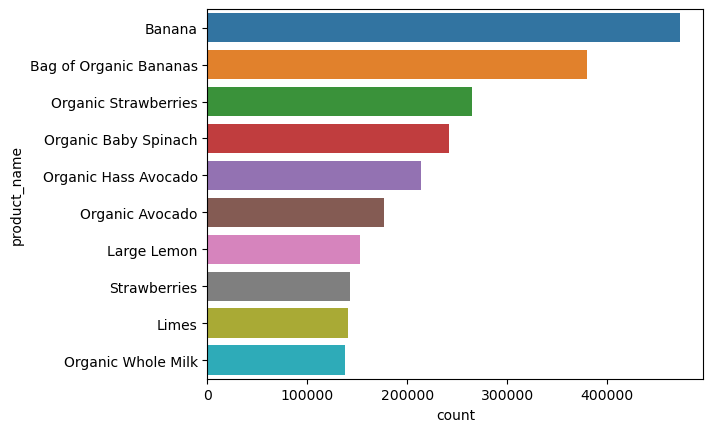

In [20]:
# 주문 품목 순위
sns.countplot(y="product_name", data=tmp_df, order = tmp_df.product_name.value_counts().iloc[:10].index)

<AxesSubplot: xlabel='count', ylabel='department'>

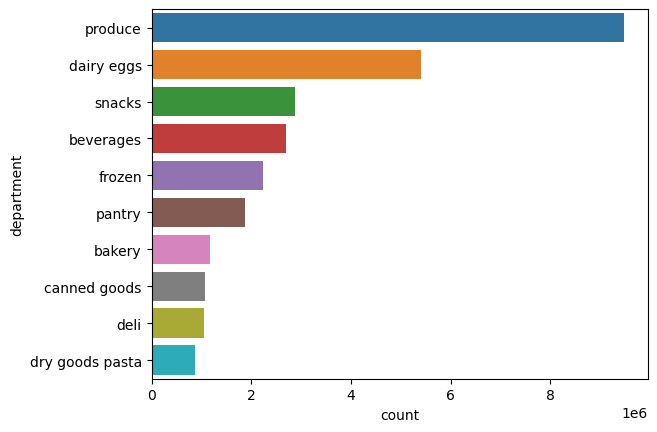

In [22]:
# 많이 팔린 department
sns.countplot(y="department", data=tmp_df, order = tmp_df.department.value_counts().iloc[:10].index)

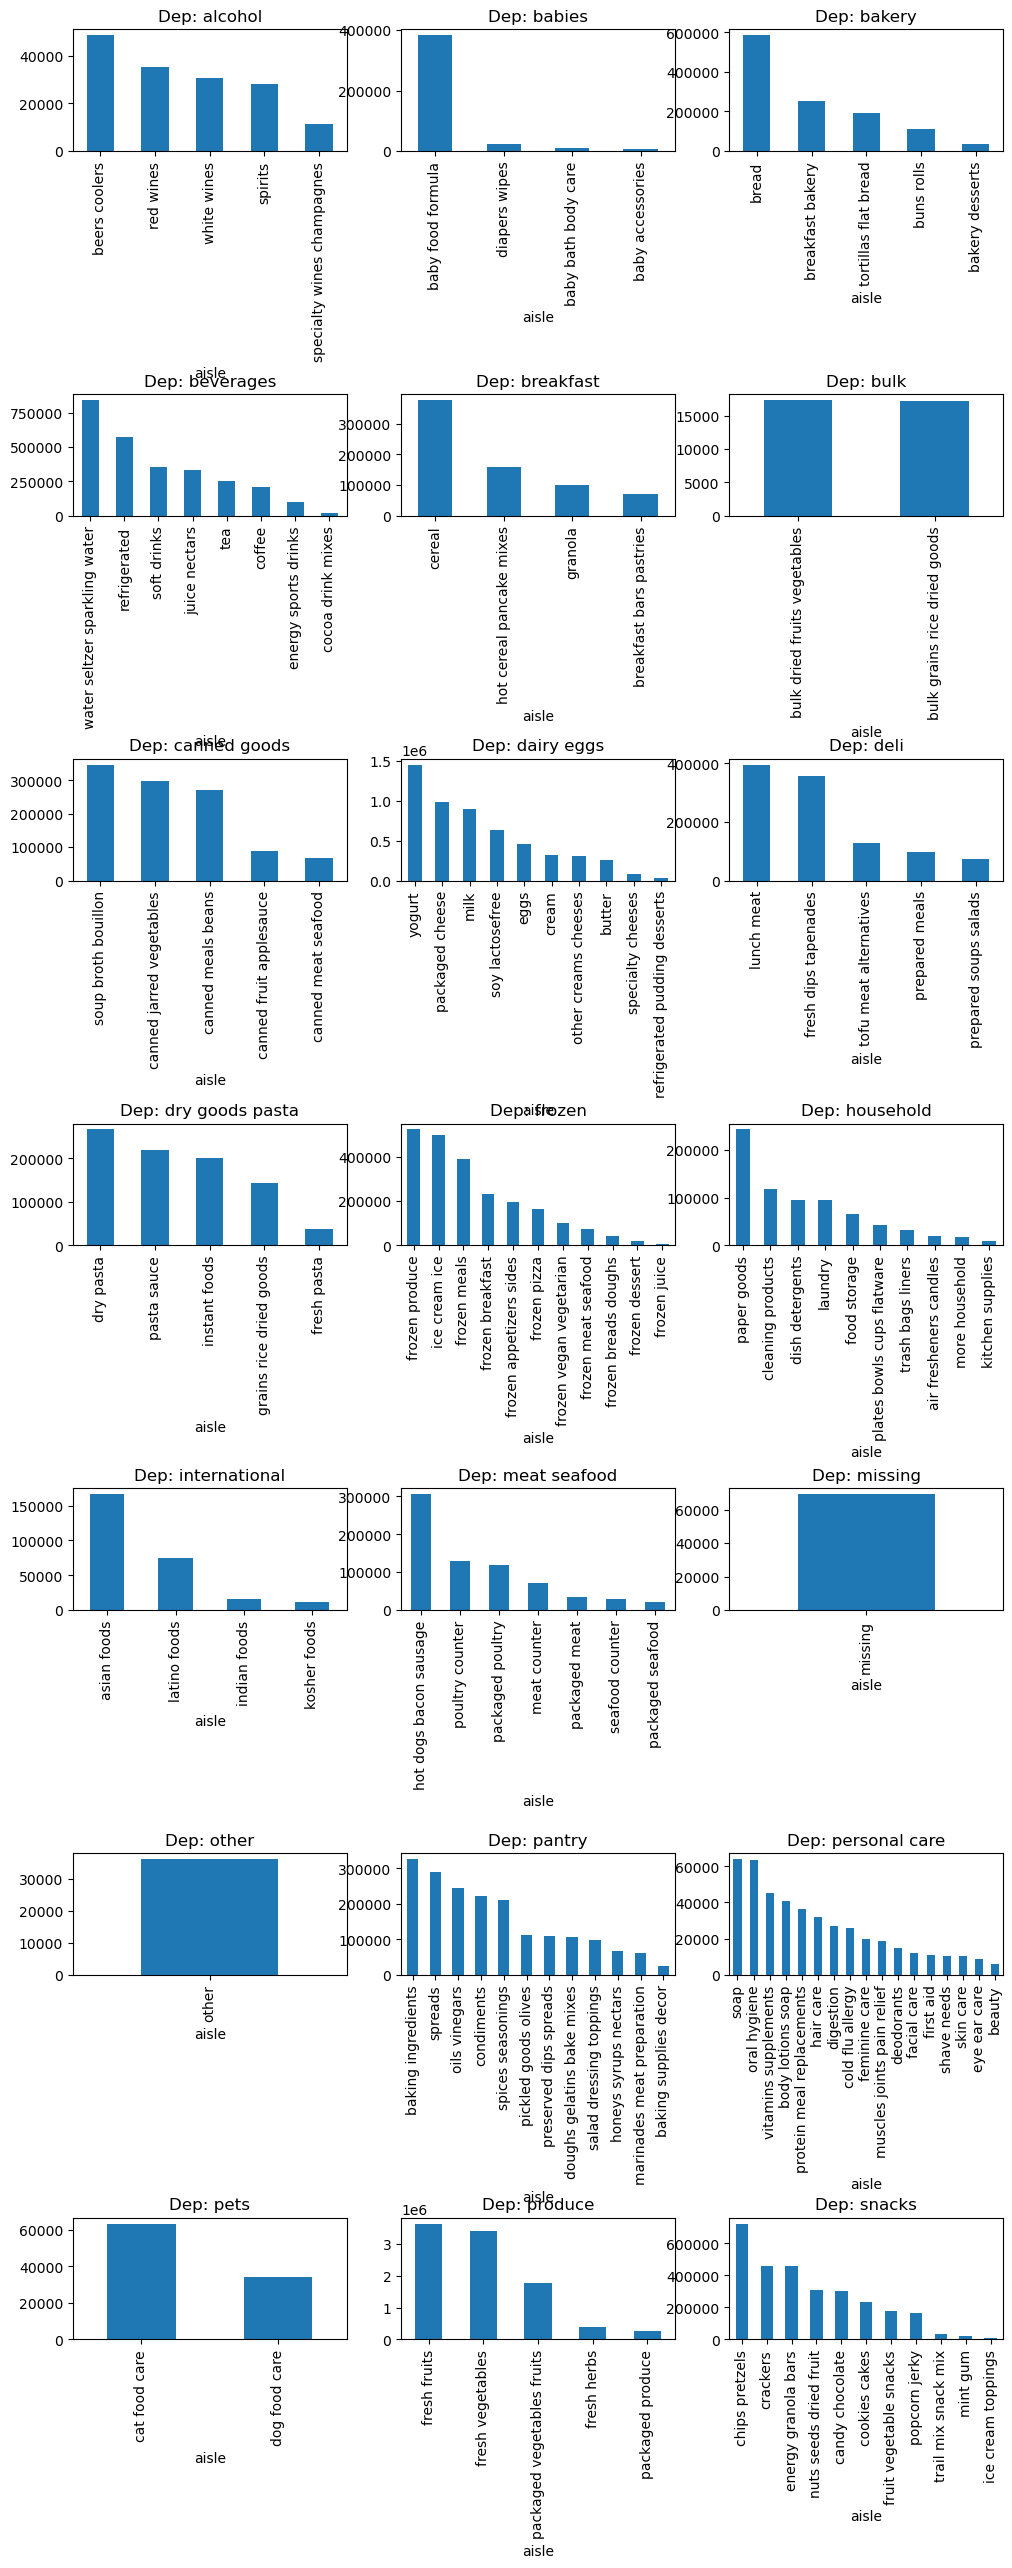

In [24]:
# 품목별 판매량 bar plot
f, axarr = plt.subplots(7, 3, figsize=(12, 30))
for i,e in enumerate(departments.department.sort_values(ascending=True)):
    axarr[i//3, i%3].set_title('Dep: {}'.format(e))
    tmp_df[tmp_df.department==e].groupby(['aisle']).count()['product_id']\
    .sort_values(ascending=False).plot(kind='bar', ax=axarr[i//3, i%3])
f.subplots_adjust(hspace=2)